In [18]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from scipy.optimize import curve_fit
from lab_lib import *


In [13]:
# sgs
#            d,     m,   B_p
balls = [[0.59, 0.791, 3054],
         [0.59, 0.864, 3207],
         [0.59, 0.816, 3133],
         [0.59, 0.802, 3070],
         [0.59, 0.816, 2118],
         [0.59, 0.845, 2874],
         [0.59, 0.838, 3064],
         [0.59, 0.832, 3076],
         [0.59, 0.820, 3070],
         [0.59, 0.829, 3049],
         [0.59, 0.840, 2829],
         [0.59, 0.832, 3085]]

balls_inacc = [0.01, 0.001, 1]

r_max = [1.87, 2.14, 2.10, 2.05, 2.10, 2.10, 2.10, 2.10, 1.80, 1.80, 2.06]
r_max = [balls[i][0] + r_max[i] for i in range(len(r_max))]
r_max_inacc = 0.01



In [14]:
m_table = [[r"\#"] + list(range(1, len(balls) + 1)),
           ["$m, г$"] + ["%.3f" % (i[1]) for i in balls]]

texTable(m_table)

m_with_inacc = [[i[1], balls_inacc[1]] for i in balls]
m_mean = meanWithInacc(m_with_inacc)
print(texAns(m_mean))



\begin{table}[!ht]
    \centering
    \begin{tabular}{|c|c|c|c|c|c|c|c|c|c|c|c|c|}
        \hline

        \# & 1 & 2 & 3 & 4 & 5 & 6 & 7 & 8 & 9 & 10 & 11 & 12\\ \hline
        $m, г$ & 0.791 & 0.864 & 0.816 & 0.802 & 0.816 & 0.845 & 0.838 & 0.832 & 0.820 & 0.829 & 0.840 & 0.832\\ \hline

    \end{tabular}
    \caption{}
    \label{}
\end{table}

$(0.827 \pm 0.006)$


In [15]:
r_max_table = [[r"\#"] + [str(i) + " - " + str(i + 1) for i in range(1, len(r_max) + 1)],
               [r"$r_{max}, см$"] + ["%.2f" % (i) for i in r_max]]

texTable(r_max_table)

r_max_with_inacc = [[i, r_max_inacc] for i in r_max]
r_max_mean = meanWithInacc(r_max_with_inacc)
print(texAns(r_max_mean))



\begin{table}[!ht]
    \centering
    \begin{tabular}{|c|c|c|c|c|c|c|c|c|c|c|c|}
        \hline

        \# & 1 - 2 & 2 - 3 & 3 - 4 & 4 - 5 & 5 - 6 & 6 - 7 & 7 - 8 & 8 - 9 & 9 - 10 & 10 - 11 & 11 - 12\\ \hline
        $r_{max}, см$ & 2.46 & 2.73 & 2.69 & 2.64 & 2.69 & 2.69 & 2.69 & 2.69 & 2.39 & 2.39 & 2.65\\ \hline

    \end{tabular}
    \caption{}
    \label{}
\end{table}

$(2.61 \pm 0.04)$


In [16]:
P_m = countWithSigma(np.sqrt(m_mean[0] * 980.665 * r_max_mean[0]**4 / 6), [[m_mean[0], m_mean[1]/2], [r_max_mean[0], r_max_mean[1]*2]])
print(texAns(P_m))

$(79 \pm 2)$


In [17]:
balls_d_mean = meanWithInacc([[i[0], balls_inacc[0]] for i in balls])

p_m = countWithSigma(P_m[0] / (4/3 * 3.14 * (balls_d_mean[0]/2)**3), [P_m, [balls_d_mean[0], balls_d_mean[1]*3]])

print(texAns(p_m))

$(740 \pm 40)$


In [19]:
B_exp_with_inacc = countWithSigma(8 * 3.14 / 3 * p_m[0], [p_m])
print(texAns(B_exp_with_inacc))

$(6200 \pm 400)$


In [21]:
P_B_table = [[r"\#"] + list(range(1, len(balls) + 1)),
             [r"$B, ед. СГСЭ$"] + [i[2] for i in balls]]

texTable(P_B_table)

B_meas_with_inacc = [[i[2], balls_inacc[2]] for i in balls]
B_meas_mean = meanWithInacc(B_meas_with_inacc)
print(texAns(B_meas_mean))



\begin{table}[!ht]
    \centering
    \begin{tabular}{|c|c|c|c|c|c|c|c|c|c|c|c|c|}
        \hline

        \# & 1 & 2 & 3 & 4 & 5 & 6 & 7 & 8 & 9 & 10 & 11 & 12\\ \hline
        $B, ед. СГСЭ$ & 3054 & 3207 & 3133 & 3070 & 2118 & 2874 & 3064 & 3076 & 3070 & 3049 & 2829 & 3085\\ \hline

    \end{tabular}
    \caption{}
    \label{}
\end{table}

$(2970 \pm 80)$


In [23]:
B_r = [4 * 3.14 * p_m[0], p_m[1]]
print(texAns(B_r))

$(9260 \pm 40)$


In [20]:
M_min = [475.398, 0.001]
F_min = countWithSigma(M_min[0] * 980, [M_min])

print(texAns(F_min))

F_0 = [i / 1.08 for i in F_min]

print(texAns(F_0))

$(465890.04 \pm 0.98)$
$(431379.7 \pm 0.9)$


In [24]:
P_m_B = countWithSigma(np.sqrt(F_0[0] * balls_d_mean[0]**4 / 6), [[F_0[0], F_0[1] * 1/2], [balls_d_mean[0], balls_d_mean[1] * 2]])

print(texAns(P_m_B))

$(93 \pm 3)$


In [25]:
B_exp_B = countWithSigma(2 * P_m_B[0] / (balls_d_mean[0] / 2)**3, [P_m_B, [balls_d_mean[0], balls_d_mean[1] * 3]])
print(texAns(B_exp_B))

$(7300 \pm 400)$


In [26]:
n_T_sum = [[12, 31.10],
           [10, 28.73],
           [8, 21.64],
           [7, 19.41],
           [6, 18.56],
           [5, 13.27],
           [4, 13.14]]

n_T = [[i[0], [i[1] / 10, 0.03]] for i in n_T_sum]
n_T.reverse()

n_T_table = [["$n, шт.$"] + [i[0] for i in n_T],
             ["$T, с$"] + ["$" + (texAns(i[1])[2:-2]) + "$" for i in n_T]]

texTable(n_T_table)




\begin{table}[!ht]
    \centering
    \begin{tabular}{|c|c|c|c|c|c|c|c|}
        \hline

        $n, шт.$ & 4 & 5 & 6 & 7 & 8 & 10 & 12\\ \hline
        $T, с$ & $1.31 \pm 0.03$ & $1.33 \pm 0.03$ & $1.86 \pm 0.03$ & $1.94 \pm 0.03$ & $2.16 \pm 0.03$ & $2.87 \pm 0.03$ & $3.11 \pm 0.03$\\ \hline

    \end{tabular}
    \caption{}
    \label{}
\end{table}



k: (0.276442396313967 +- 0.007395302470490303)


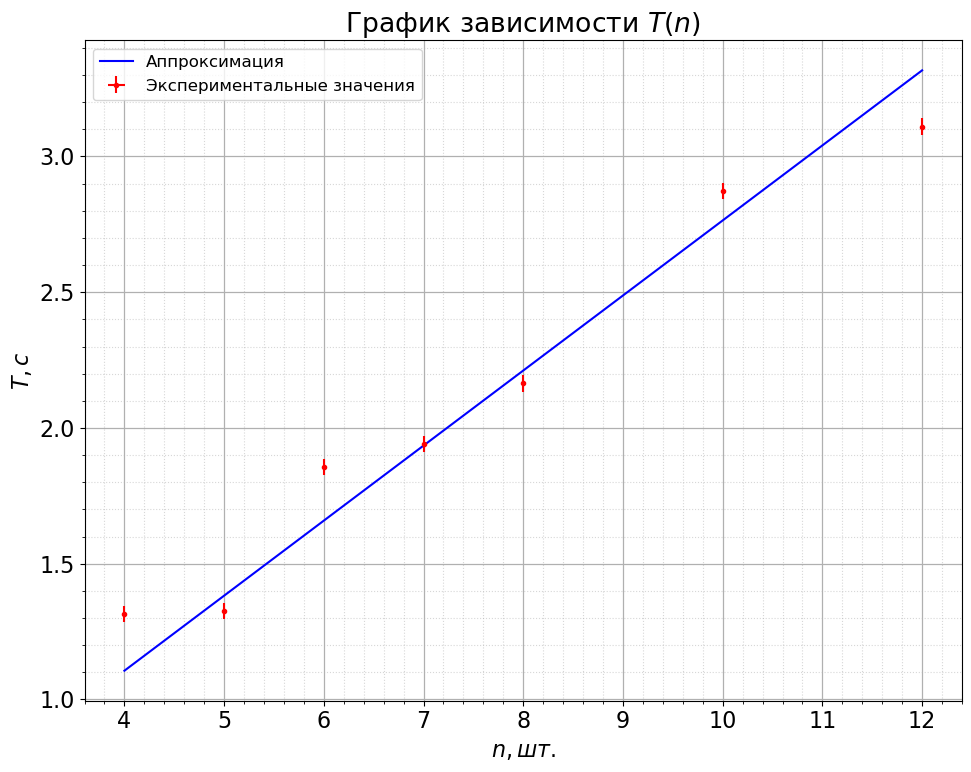

In [28]:
k_h = make_mnk_direct_prop("img/horizontal.png", "График зависимости $T(n)$", "$n, шт.$", "$T, с$",
                           [i[0] for i in n_T], [i[1][0] for i in n_T], [0] * len(n_T), [i[1][1] for i in n_T])

In [29]:
B_h = countWithSigma(3.14**2 * m_mean[0] * balls_d_mean[0]**2 / (3 * k_h[0]**2 * P_m[0]),
                     [m_mean, [balls_d_mean[0], balls_d_mean[1] * 2], [k_h[0], k_h[1] * 2]])
print(texAns(B_h))

$(0.1563 \pm 0.0100)$


In [33]:
n_m = [[12, 0.218],
       [10, 0.158],
       [8, 0.158],
       [6, 0.240],
       [4, 0.372]]

n_m.reverse()

n_M = [[i[0], countWithSigma(i[1] * (i[0] / 2 - 1) * balls_d_mean[0] * 980, [balls_d_mean, [i[1], 0.001]])] for i in n_m]

n_M_table = [["$n, шт.$"] + [i[0] for i in n_M],
             ["$m, г$"] + ["$" + texAns([i[1], 0.001])[2:-2] + "$" for i in n_m],
             ["$M, г*см$"] + ["$" + texAns(i[1])[2:-2] + "$" for i in n_M]]

texTable(n_M_table)



\begin{table}[!ht]
    \centering
    \begin{tabular}{|c|c|c|c|c|c|}
        \hline

        $n, шт.$ & 4 & 6 & 8 & 10 & 12\\ \hline
        $m, г$ & $0.3720 \pm 0.0010$ & $0.2400 \pm 0.0010$ & $0.1580 \pm 0.0010$ & $0.1580 \pm 0.0010$ & $0.2180 \pm 0.0010$\\ \hline
        $M, г*см$ & $215 \pm 4$ & $278 \pm 5$ & $274 \pm 5$ & $365 \pm 7$ & $630 \pm 10$\\ \hline

    \end{tabular}
    \caption{}
    \label{}
\end{table}



k: (44.26442218474754 +- 4.063226206952339)


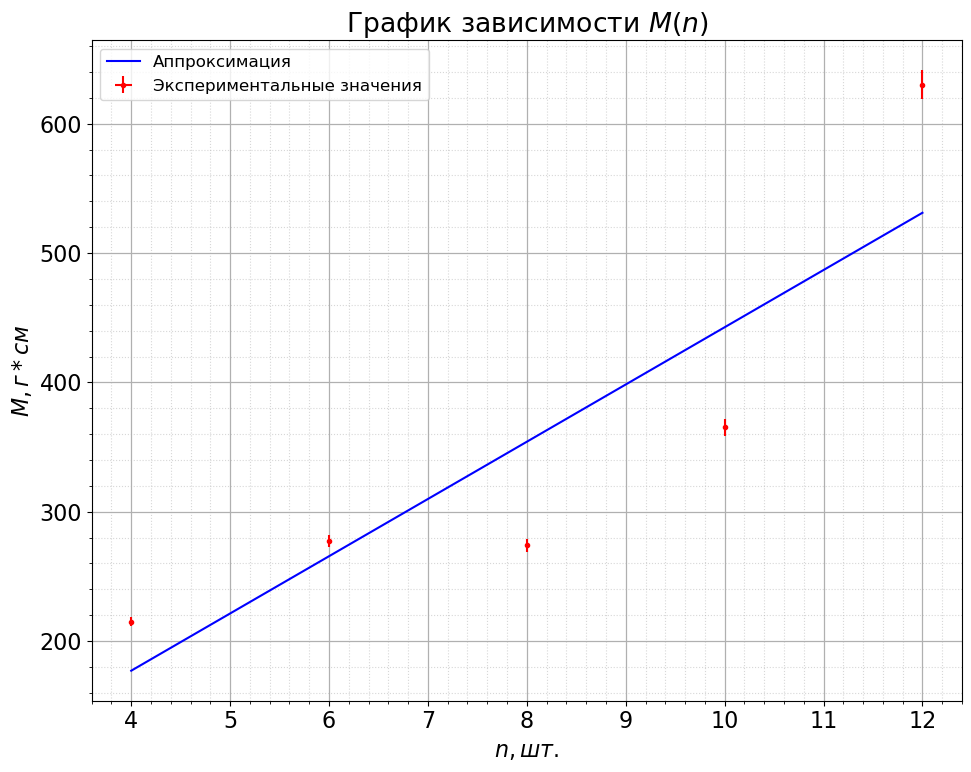

[np.float64(44.26442218474754), np.float64(4.063226206952339)]

In [34]:
make_mnk_direct_prop("img/vertical.png", "График зависимости $M(n)$", "$n, шт.$", "$M, г*см$",
                     [i[0] for i in n_M], [i[1][0] for i in n_M], [0] * len(n_M), [i[1][1] for i in n_M])